In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 20 files belonging to 5 classes.
Predictions:
 [[4.5670164e-03 9.9022698e-01 5.1103984e-03 1.8184275e-05 7.7462071e-05]
 [6.5911007e-03 2.1562690e-02 7.2711608e-03 6.2371902e-02 9.0220314e-01]
 [7.3898572e-04 9.6948820e-01 7.7077915e-05 1.8694192e-02 1.1001577e-02]
 [4.7487923e-04 5.0656396e-01 8.4168881e-02 3.8364728e-04 4.0840855e-01]
 [2.0157382e-05 3.9535271e-06 8.7566684e-07 1.5032724e-04 9.9982470e-01]
 [2.3512179e-02 2.1704873e-02 2.1462438e-05 4.3794143e-01 5.1682001e-01]
 [1.4070803e-03 2.6784684e-03 9.2471157e-05 9.9406624e-01 1.7556906e-03]
 [6.1262339e-02 3.5017584e-02 1.2013277e-04 9.0343821e-01 1.6173374e-04]
 [2.1693779e-03 1.4395599e-01 1.0565470e-01 4.6815250e-02 7.0140469e-01]
 [1.7927187e-02 2.9673614e-02 3.4529556e-05 1.4561644e-01 8.0674827e-01]
 [9.8102415e-01 6.2046811e-06 2.8024638e-07 3.9362829e-05 1.8929979e-02]
 [2.4948342e-04 2.8566774e-02 4.2900167e-02 1.7407862e-02 9.1087574e-01]
 [1.6417671e-03 5.2563533e-02 2.4319145e-04 9.4542789e-01 1.2367059e-04

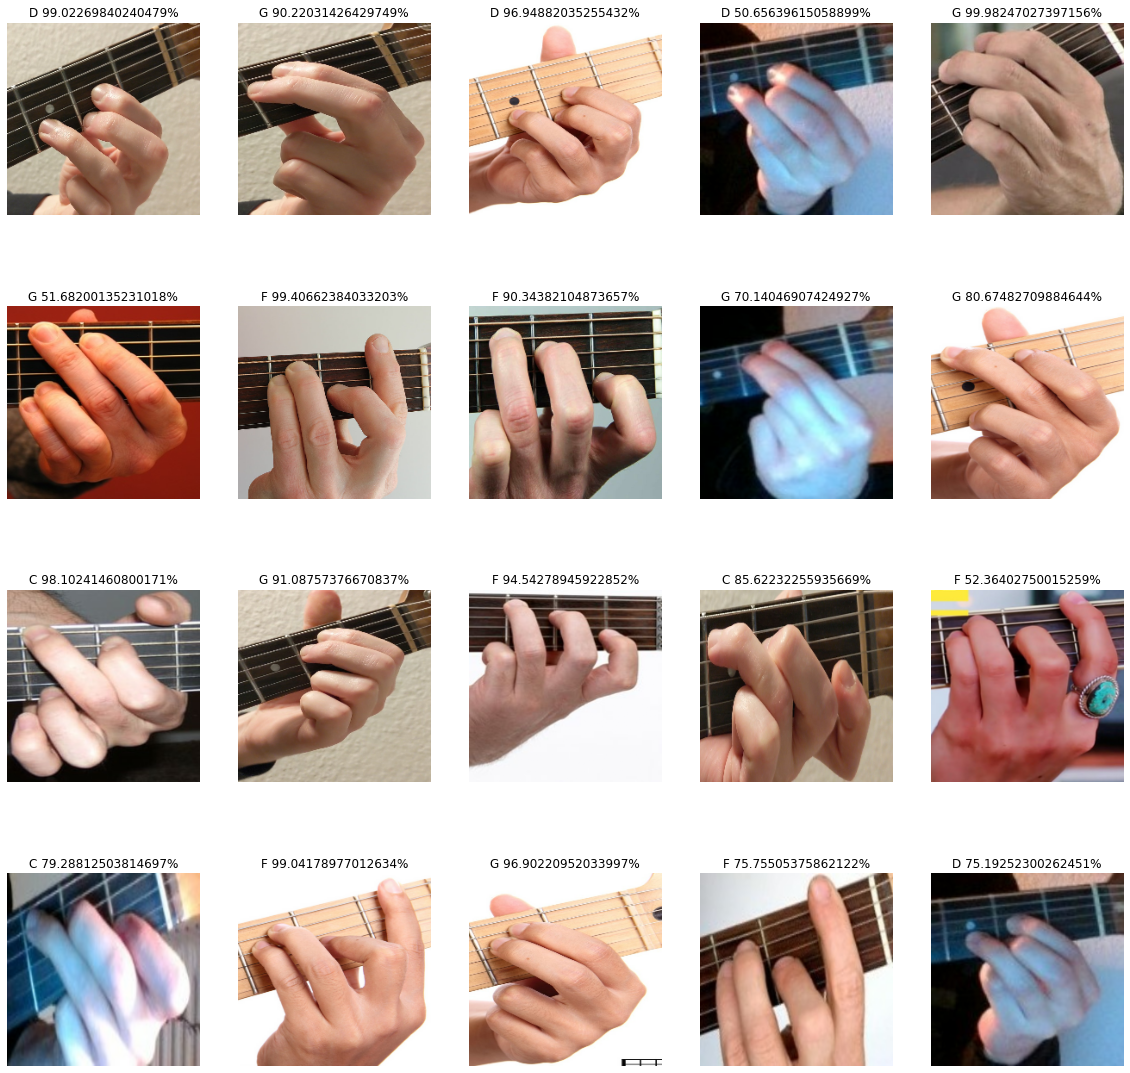

In [2]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image
from keras.applications import imagenet_utils

CATEGORIES = ["C","D","Em", "F", "G"]
#CATEGORIES = ["0","1","2", "3", "4", "5", "6", "7", "8", "9"]

ROOT = "/content/drive/MyDrive/EML"

model = tf.keras.models.load_model(os.path.join(ROOT, "Guitar_Model_V4"))
# model.summary()


# DIR = '/content/drive/MyDrive/EML/Guitar_Chord_Data_Set/C_augmented'
# print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

def prepare(filepath):
  img = image.load_img(filepath, target_size=(224, 224))
  return preprocess_input(image.img_to_array(img))


# def prepare(filepath):
#   img = image.load_img(filepath, target_size=(224, 224), color_mode='grayscale')
#   rgb_array = image.img_to_array(img)
#   rgb_array = np.repeat(rgb_array, 3, -1)
#   rgb_array = np.expand_dims(rgb_array, axis=0)
#   return preprocess_input(rgb_array)

def make_prediction(image_name, expected_str):
  prediction = model.predict(prepare(os.path.join(ROOT, image_name)))
  # print(prediction)
  pred = np.argmax(prediction, axis=-1)
  print(CATEGORIES[pred[0]], "with confidence of " + str(prediction[0][pred[0]]*100) + str("%"), "expected ", expected_str)
  # print(CATEGORIES[pred])

#make_prediction("Test_Images/Sign_Language/example_0.JPG")
#make_prediction("Test_Images/Sign_Language/example_1.JPG")
#make_prediction("Test_Images/Sign_Language/example_2.JPG")
#make_prediction("Test_Images/Sign_Language/example_3.JPG")
#make_prediction("Test_Images/Sign_Language/example_4.JPG")
#make_prediction("Test_Images/Sign_Language/example_5.JPG")
#make_prediction("Test_Images/Sign_Language/example_6.JPG")
#make_prediction("Test_Images/Sign_Language/example_7.JPG")
#make_prediction("Test_Images/Sign_Language/example_8.JPG")
#make_prediction("Test_Images/Sign_Language/example_9.JPG")

# make_prediction("Test_Images/Guitar_Chord/C/C0.jpg", "C")
# make_prediction("Test_Images/Guitar_Chord/C/C1.jpg", "C")
# make_prediction("Test_Images/Guitar_Chord/C/C2.jpg", "C")
# make_prediction("Test_Images/Guitar_Chord/C/C3.jpg", "C")
# make_prediction("Test_Images/c_major_cut.jpeg", "C")
# print('')
# make_prediction("Test_Images/Guitar_Chord/D/D0.jpg", "D")
# make_prediction("Test_Images/Guitar_Chord/D/D1.jpg", "D")
# make_prediction("Test_Images/Guitar_Chord/D/D3.jpg", "D")
# make_prediction("Test_Images/d_major_cut.jpeg", "D")
# print('')
# make_prediction("Test_Images/Guitar_Chord/Em/E0.jpg", "Em")
# make_prediction("Test_Images/Guitar_Chord/Em/E1.jpg", "Em")
# make_prediction("Test_Images/e_minor_cut.jpeg", "Em")

#Retrieve a batch of images from the test set

test_dataset = image_dataset_from_directory("/content/drive/MyDrive/EML/Test_Images/guitar_roi",
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224,224))

image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

print('Predictions:\n', predictions)
print('Labels:\n', label_batch)

predictedLabels = np.empty(20, dtype=np.int)

plt.figure(figsize=(20,20))
for i in range(20):
  ax = plt.subplot(4, 5, i + 1)
  plt.imshow(image_batch[i]/255)
  pred = np.argmax(predictions[i], axis=-1)
  predictedLabels[i] = pred
  plt.title(CATEGORIES[pred] + " " + str(predictions[i][pred]*100)+ "%")
  plt.axis("off")

Confusion matrix, without normalization
[[2 0 0 2 0]
 [0 4 0 0 0]
 [0 0 0 0 4]
 [0 0 0 4 0]
 [1 0 0 0 3]]


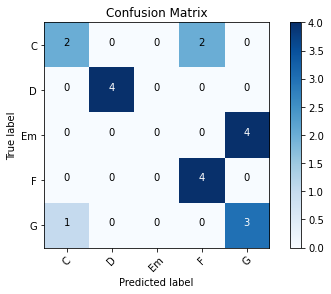

In [3]:
from sklearn.metrics import confusion_matrix
import itertools

predictions = np.array([])
labels =  np.array([])
for x, y in test_dataset:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)])
  labels = np.concatenate([labels, y.numpy()]).astype(int)


def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_true=labels, y_pred=predictions)
plot_confusion_matrix(cm=cm, classes=CATEGORIES, title='Confusion Matrix')